In [1]:
%%capture
import os
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Get all of the data from the patient_uuid table and load into a pandas dataframe

patient_table = pd.read_csv('/Users/nikhil/Documents/FOXG1-Data-Repository/Natural-History-Study-Data/10.21.2023/FOXG1-MASTER - demographics.csv')
#patient_table.rename(columns = {'entity:patient_uuid_id':'patient_uuid'}, inplace = True)

growth_df = pd.read_csv('/Users/nikhil/Documents/FOXG1-Data-Repository/Natural-History-Study-Data/10.21.2023/FOXG1-MASTER - growth_parameters.csv')
df = growth_df

df = df.merge(patient_table, on='patient_uuid')
df.shape

(5396, 12)

In [3]:
# Convert growth_parameter_value to numeric
df['growth_parameter_value'] = pd.to_numeric(df['growth_parameter_value'], errors='coerce')

# Normalize units for weight (from 'g' to 'kg')
df.loc[df['growth_parameter_unit'] == 'g', 'growth_parameter_value'] /= 1000
df.loc[df['growth_parameter_unit'] == 'g', 'growth_parameter_unit'] = 'kg'

# Normalize units for height (from 'm' to 'cm')
df.loc[df['growth_parameter_unit'] == 'm', 'growth_parameter_value'] *= 100
df.loc[df['growth_parameter_unit'] == 'm', 'growth_parameter_unit'] = 'cm'

df.sample(5)


,patient_uuid,growth_parameter,growth_parameter_code,growth_parameter_code_system,growth_parameter_value,growth_parameter_unit,growth_parameter_date,growth_parameter_age_days,date_of_birth,age_at_diagnosis,sex,most_recent_records_date
3492,a9964038-095f-4b05-a16b-4d9ec1af8b50,Body weight,29463-7,LOINC,12.70,kg,2017-01-23,1346,2013-05-18,4.0,female,2022-01-15
53,0f49182c-9112-4dae-98b6-ea03be3aeae1,Body weight,29463-7,LOINC,5.03,kg,2016-11-10,59,2016-09-12,1.0,male,2022-04-21
4252,d1bbf243-b059-4901-b029-49e129930f4e,Body weight,29463-7,LOINC,9.20,kg,2019-08-22,349,2018-09-07,1.0,male,2021-11-30
1303,42fe125c-e245-468f-a096-a73bca8f575c,Body weight,29463-7,LOINC,20.60,kg,2018-09-14,2214,2012-08-22,0.0,male,2021-03-15
4570,dbac4970-31d8-4694-830f-7d51edf6d041,Body weight,29463-7,LOINC,7.15,kg,2008-12-11,181,2008-06-13,3.0,female,2021-02-19


In [4]:
# Define the growth parameters and genders
growth_parameters_list = ['Body weight', 'Body height', 'Head circumference']
genders = ['male', 'female']

df['growth_parameter_age_years'] = df['growth_parameter_age_days'] / 365
df['growth_parameter_age_month'] = df['growth_parameter_age_days'] / 30.44
df['Month'] = round(df['growth_parameter_age_month'])

df['Month'] = df['Month'].apply(lambda x: round(x))
df.sample(5)

,patient_uuid,growth_parameter,growth_parameter_code,growth_parameter_code_system,growth_parameter_value,growth_parameter_unit,growth_parameter_date,growth_parameter_age_days,date_of_birth,age_at_diagnosis,sex,most_recent_records_date,growth_parameter_age_years,growth_parameter_age_month,Month
1643,4b5393b7-17b4-4f59-8101-331e7d6e1809,Body height,8302-2,LOINC,77.5,cm,2010-07-28,577,2008-12-28,2.0,male,2021-03-02,1.580822,18.955322,19
1353,4375594d-d095-4600-abbb-7ab691bf9740,Body weight,29463-7,LOINC,9.6,kg,2009-01-05,418,2007-11-14,7.0,male,2022-05-10,1.145205,13.731932,14
2977,888490d9-55bc-4370-84f8-260bfe1fbbd0,Body height,8302-2,LOINC,109.0,cm,2010-05-11,2277,2004-02-15,6.0,male,2021-01-29,6.238356,74.802891,75
3700,b20fef31-803e-40fb-a368-3efc88416652,Body height,8302-2,LOINC,152.4,cm,2020-07-20,5054,2006-09-18,4.0,female,2021-04-05,13.846575,166.031537,166
4656,dbac4970-31d8-4694-830f-7d51edf6d041,Body weight,29463-7,LOINC,27.4,kg,2017-07-10,3314,2008-06-13,3.0,female,2021-02-19,9.079452,108.869908,109


In [5]:
## split df by sex

male_df = df[df['sex'] == 'male']
female_df = df[df['sex'] == 'female']


#split each sex df further by growth parameters

male_head_circumference_df = male_df[male_df['growth_parameter'] == 'Head circumference']
female_head_circumference_df = female_df[female_df['growth_parameter'] == 'Head circumference']
male_body_weight_df = male_df[male_df['growth_parameter'] == 'Body weight']
female_body_weight_df = female_df[female_df['growth_parameter'] == 'Body weight']
male_body_height_df = male_df[male_df['growth_parameter'] == 'Body height']
female_body_height_df = female_df[female_df['growth_parameter'] == 'Body height']

#male_head_circumference_df.sample(5)
#female_head_circumference_df.loc[female_head_circumference_df['patient_uuid'] == '0107b8f7-e0ee-4d83-bf9f-7d8e3a8da3d4']
male_head_circumference_df.sample(5)


,patient_uuid,growth_parameter,growth_parameter_code,growth_parameter_code_system,growth_parameter_value,growth_parameter_unit,growth_parameter_date,growth_parameter_age_days,date_of_birth,age_at_diagnosis,sex,most_recent_records_date,growth_parameter_age_years,growth_parameter_age_month,Month
1545,46d3c904-7ce9-4703-ab2f-744c20cda9d3,Head circumference,8287-5,LOINC,40.6,cm,2019-02-20,375,2018-02-10,1.0,male,2021-03-03,1.027397,12.319317,12
4138,c9f78967-d6c1-46ff-85fb-9277634ab864,Head circumference,8287-5,LOINC,43.5,cm,2015-06-25,204,2014-12-03,4.0,male,2021-02-20,0.558904,6.701708,7
2950,888490d9-55bc-4370-84f8-260bfe1fbbd0,Head circumference,8287-5,LOINC,46.0,cm,2007-01-24,1074,2004-02-15,6.0,male,2021-01-29,2.942466,35.282523,35
3168,8f622d13-1719-415a-a3f2-67e476fe36f9,Head circumference,8287-5,LOINC,42.0,cm,2019-10-11,773,2017-08-29,0.0,male,2021-01-18,2.117808,25.394218,25
4741,df0aa56a-166b-4789-b90d-6a1f20ba7582,Head circumference,8287-5,LOINC,48.0,cm,2017-11-30,3388,2008-08-21,4.0,male,2022-02-24,9.282192,111.300920,111


In [10]:
############### Need to calculate (population mean, sd) for population data at each month
############## Basically, get the mean and sd for recording at each month. then plot a line through mean at each month reading
##### This is good appraoch. However, it would be best to fit regression model through the multiple readings that could occur. This gives 
###### us more data points to fit the model.

### Even though we compute stats table here with appraoch, we dont use it as using more data points gives better/accurate graph
### than just using population mean at a particular month.

male_head_circumference_df.Month.unique()

# To calculate the mean and standard deviation of 'growth_parameter_value' for each 'Month',
# you can use the groupby() method followed by agg() to apply multiple aggregation functions.

#stats = male_head_circumference_df.groupby('Month')['growth_parameter_value'].agg(['mean', 'std']).reset_index()
stats = male_head_circumference_df.groupby('Month')['growth_parameter_value'].agg(['mean', lambda x: np.std(x, ddof=0)]).reset_index()

# If some months may have only one 'growth_parameter_value' and you want to avoid NaN in 'std',
# you can use a lambda function to apply np.std with ddof=0.
# Example: .agg(['mean', lambda x: np.std(x, ddof=0)])

stats.columns = ['Month', 'Mean', 'Standard Deviation']  # Renaming the columns for clarity
stats




,patient_uuid,growth_parameter,growth_parameter_code,growth_parameter_code_system,growth_parameter_value,growth_parameter_unit,growth_parameter_date,growth_parameter_age_days,date_of_birth,age_at_diagnosis,sex,most_recent_records_date,growth_parameter_age_years,growth_parameter_age_month,Month
34,095a3f6d-e37c-4564-9da4-84005ac266cc,Head circumference,8287-5,LOINC,43.0,cm,2014-10-31,562,2013-04-17,0.0,male,2021-03-19,1.539726,18.462549,18
38,095a3f6d-e37c-4564-9da4-84005ac266cc,Head circumference,8287-5,LOINC,48.3,cm,2019-04-16,2190,2013-04-17,0.0,male,2021-03-19,6.000000,71.944809,72
41,095a3f6d-e37c-4564-9da4-84005ac266cc,Head circumference,8287-5,LOINC,47.0,cm,2019-07-03,2268,2013-04-17,0.0,male,2021-03-19,6.213699,74.507227,75
48,0f49182c-9112-4dae-98b6-ea03be3aeae1,Head circumference,8287-5,LOINC,35.0,cm,2016-09-14,2,2016-09-12,1.0,male,2022-04-21,0.005479,0.065703,0
52,0f49182c-9112-4dae-98b6-ea03be3aeae1,Head circumference,8287-5,LOINC,36.4,cm,2016-09-26,14,2016-09-12,1.0,male,2022-04-21,0.038356,0.459921,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5287,f4a8f50f-adec-4d84-a255-efbfc03b42e2,Head circumference,8287-5,LOINC,41.6,cm,2018-08-30,436,2017-06-20,0.0,male,2022-02-18,1.194521,14.323259,14
5297,f4a8f50f-adec-4d84-a255-efbfc03b42e2,Head circumference,8287-5,LOINC,42.4,cm,2019-01-10,569,2017-06-20,0.0,male,2022-02-18,1.558904,18.692510,19
5300,f4a8f50f-adec-4d84-a255-efbfc03b42e2,Head circumference,8287-5,LOINC,44.0,cm,2019-01-30,589,2017-06-20,0.0,male,2022-02-18,1.613699,19.349540,19
5303,f4a8f50f-adec-4d84-a255-efbfc03b42e2,Head circumference,8287-5,LOINC,43.0,cm,2019-04-05,654,2017-06-20,0.0,male,2022-02-18,1.791781,21.484888,21


In [7]:
############ Read all WHO files

who_male_head_circumference_df = pd.read_csv('/Users/nikhil/Documents/foxg1-analysis-notebooks/WHO-DATA-ZSCORES/head-circumference-boys-0-5-month-boys.csv')
who_female_head_circumference_df = pd.read_csv ('/Users/nikhil/Documents/foxg1-analysis-notebooks/WHO-DATA-ZSCORES/head-circumference-boys-0-5-month-girls.csv')
who_male_body_weight_df = pd.read_csv ('/Users/nikhil/Documents/foxg1-analysis-notebooks/WHO-DATA-ZSCORES/body-weight-0-10-month-boys.csv')
who_female_body_weight_df = pd.read_csv ('/Users/nikhil/Documents/foxg1-analysis-notebooks/WHO-DATA-ZSCORES/body-weight-0-10-month-girls.csv')
who_male_body_height_df = pd.read_csv ('/Users/nikhil/Documents/foxg1-analysis-notebooks/WHO-DATA-ZSCORES/body-height-0-19-month-boys.csv')
who_female_body_height_df = pd.read_csv ('/Users/nikhil/Documents/foxg1-analysis-notebooks/WHO-DATA-ZSCORES/body-height-0-19-month-girls.csv')

## height table does not have standard deviation, so lets compute that

who_male_body_weight_df['SD'] = who_male_body_weight_df['M'] * who_male_body_weight_df['S']
who_female_body_weight_df['SD'] = who_female_body_weight_df['M'] * who_female_body_weight_df['S']
who_male_head_circumference_df.sample(5)

,Month,L,M,S,SD,SD3neg,SD2neg,SD1neg,SD0,SD1,SD2,SD3
20,20,1,47.6919,0.02806,1.3382,43.7,45.0,46.4,47.7,49.0,50.4,51.7
22,22,1,47.9833,0.02813,1.3498,43.9,45.3,46.6,48.0,49.3,50.7,52.0
11,11,1,45.7573,0.02789,1.2762,41.9,43.2,44.5,45.8,47.0,48.3,49.6
51,51,1,50.3578,0.02921,1.4710,45.9,47.4,48.9,50.4,51.8,53.3,54.8
25,25,1,48.3777,0.02825,1.3667,44.3,45.6,47.0,48.4,49.7,51.1,52.5


In [84]:
##### Merge dataframes with WHO dataframes with zscores/sd on Month
### By default join here is inner join, meaning only months that are found in both WHO and FOXG1 data
#### are plotted, FOXG1 data has more months but doesnt make sense to plot them as we dont have
#### corresponding WHO data.

### Also, we dont use stats here, as explained earlier, using more data points gives accurate graph.


male_head_circumference_zscore_df = pd.merge(male_head_circumference_df, who_male_head_circumference_df, on='Month', how="outer")
female_head_circumference_zscore_df = pd.merge(female_head_circumference_df, who_female_head_circumference_df, on='Month', how="outer")
male_body_weight_zscore_df = pd.merge(male_body_weight_df, who_male_body_weight_df, on='Month', how="outer")
female_body_weight_zscore_df = pd.merge(female_body_weight_df, who_female_body_weight_df, on='Month', how="outer")
male_body_height_zscore_df = pd.merge(male_body_height_df, who_male_body_height_df, on='Month', how="outer")
female_body_height_zscore_df = pd.merge(female_body_height_df, who_female_body_height_df, on='Month', how="outer")

male_head_circumference_zscore_df.shape
male_head_circumference_zscore_df.sample(5)

,patient_uuid,growth_parameter,growth_parameter_code,growth_parameter_code_system,growth_parameter_value,growth_parameter_unit,growth_parameter_date,growth_parameter_age_days,date_of_birth,age_at_diagnosis,sex,most_recent_records_date,growth_parameter_age_years,growth_parameter_age_month,Month,L,M,S,SD,SD3neg,SD2neg,SD1neg,SD0,SD1,SD2,SD3
289,c9f78967-d6c1-46ff-85fb-9277634ab864,Head circumference,8287-5,LOINC,50.4,cm,2016-11-17,715.0,2014-12-03,4.0,male,2021-02-20,1.958904,23.488830,23,1.0,48.1201,0.02817,1.3555,44.1,45.4,46.8,48.1,49.5,50.8,52.2
258,27f81f0c-029c-4feb-84f2-8c544ebe11bb,Head circumference,8287-5,LOINC,41.0,cm,2021-06-08,239.0,2020-10-12,0.0,male,2022-02-10,0.654795,7.851511,8,1.0,44.5300,0.02796,1.2451,40.8,42.0,43.3,44.5,45.8,47.0,48.3
378,3ea45c51-7672-4658-b8f5-6a06e741b2c1,Head circumference,8287-5,LOINC,41.5,cm,2018-06-27,283.0,2017-09-17,1.0,male,2021-05-11,0.775342,9.296978,9,1.0,44.9998,0.02792,1.2564,41.2,42.5,43.7,45.0,46.3,47.5,48.8
52,e7b40795-7b93-4b18-ba30-8b6bb0097852,Head circumference,8287-5,LOINC,31.6,cm,2020-09-14,3.0,2020-09-11,0.0,male,2021-11-08,0.008219,0.098555,0,1.0,34.4618,0.03686,1.2703,30.7,31.9,33.2,34.5,35.7,37.0,38.3
377,3ea45c51-7672-4658-b8f5-6a06e741b2c1,Head circumference,8287-5,LOINC,41.7,cm,2018-06-21,277.0,2017-09-17,1.0,male,2021-05-11,0.758904,9.099869,9,1.0,44.9998,0.02792,1.2564,41.2,42.5,43.7,45.0,46.3,47.5,48.8


In [85]:

### We are calculating Z-scores, with two methods here
### But Z-score are are not used for plotting
### rather we are fitting regression model to growth parameters data
# Calculate Z-Scores
male_head_circumference_zscore_df['zscore'] = (male_head_circumference_zscore_df['growth_parameter_value'] - male_head_circumference_zscore_df['M']) / male_head_circumference_zscore_df['SD']
female_head_circumference_zscore_df['zscore'] = (female_head_circumference_zscore_df['growth_parameter_value'] - female_head_circumference_zscore_df['M']) / female_head_circumference_zscore_df['SD']
male_body_weight_zscore_df['zscore'] = (male_body_weight_zscore_df['growth_parameter_value'] - male_body_weight_zscore_df['M']) / male_body_weight_zscore_df['SD']
female_body_weight_zscore_df['zscore'] = (female_body_weight_zscore_df['growth_parameter_value'] - female_body_weight_zscore_df['M']) / female_body_weight_zscore_df['SD']
male_body_height_zscore_df['zscore'] = (male_body_height_zscore_df['growth_parameter_value'] - male_body_height_zscore_df['M']) / male_body_height_zscore_df['SD']
female_body_height_zscore_df['zscore'] = (female_body_height_zscore_df['growth_parameter_value'] - female_body_height_zscore_df['M']) / female_body_height_zscore_df['SD']

# Calcualte Z-Scores using LMS model
# reference : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7849193/#:~:text=Z%20score%20was%20calculated%20from,0%20(18%E2%80%9320).
# reference : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4991205/
def calculate_z_score(growth_parameter_value, L, M, S):
        return ((growth_parameter_value / M) ** L - 1) / (L * S)
    
male_head_circumference_zscore_df['zscore_lms'] = male_head_circumference_zscore_df.apply(lambda x: calculate_z_score(x['growth_parameter_value'], x['L'], x['M'], x['S']), axis=1)
female_head_circumference_zscore_df['zscore_lms'] = female_head_circumference_zscore_df.apply(lambda x: calculate_z_score(x['growth_parameter_value'], x['L'], x['M'], x['S']), axis=1)
male_body_weight_zscore_df['zscore_lms'] = male_body_weight_zscore_df.apply(lambda x: calculate_z_score(x['growth_parameter_value'], x['L'], x['M'], x['S']), axis=1)
female_body_weight_zscore_df['zscore_lms'] = female_body_weight_zscore_df.apply(lambda x: calculate_z_score(x['growth_parameter_value'], x['L'], x['M'], x['S']), axis=1)
male_body_height_zscore_df['zscore_lms'] = male_body_height_zscore_df.apply(lambda x: calculate_z_score(x['growth_parameter_value'], x['L'], x['M'], x['S']), axis=1)
female_body_height_zscore_df['zscore_lms'] = female_body_height_zscore_df.apply(lambda x: calculate_z_score(x['growth_parameter_value'], x['L'], x['M'], x['S']), axis=1)

pd.set_option('display.max_columns', None)

male_head_circumference_zscore_df.sample(5)

,patient_uuid,growth_parameter,growth_parameter_code,growth_parameter_code_system,growth_parameter_value,growth_parameter_unit,growth_parameter_date,growth_parameter_age_days,date_of_birth,age_at_diagnosis,sex,most_recent_records_date,growth_parameter_age_years,growth_parameter_age_month,Month,L,M,S,SD,SD3neg,SD2neg,SD1neg,SD0,SD1,SD2,SD3,zscore,zscore_lms
647,8e2446b4-678c-4599-b2e3-42b21da501a2,Head circumference,8287-5,LOINC,45.5,cm,2018-09-04,931.0,2016-02-16,1.0,male,2021-02-25,2.550685,30.584757,31,1.0,49.0327,0.02851,1.3979,44.8,46.2,47.6,49.0,50.4,51.8,53.2,-2.527148,-2.527108
421,c9f78967-d6c1-46ff-85fb-9277634ab864,Head circumference,8287-5,LOINC,41.9,cm,2015-04-10,128.0,2014-12-03,4.0,male,2021-02-20,0.350685,4.204993,4,1.0,41.6317,0.02868,1.1940,38.0,39.2,40.4,41.6,42.8,44.0,45.2,0.224707,0.224707
219,34b93467-94bf-4efa-a5f9-a238ca69c1e1,Head circumference,8287-5,LOINC,44.0,cm,2012-07-19,1205.0,2009-04-01,7.0,male,2022-06-01,3.301370,39.586071,40,1.0,49.7465,0.02886,1.4357,45.4,46.9,48.3,49.7,51.2,52.6,54.1,-4.002577,-4.002622
24,31098182-8ed4-4e91-910c-b14c0e38fbea,Head circumference,8287-5,LOINC,35.0,cm,2019-04-26,0.0,2019-04-26,0.0,male,2021-02-01,0.000000,0.000000,0,1.0,34.4618,0.03686,1.2703,30.7,31.9,33.2,34.5,35.7,37.0,38.3,0.423679,0.423692
449,d1bbf243-b059-4901-b029-49e129930f4e,Head circumference,8287-5,LOINC,42.0,cm,2019-10-04,392.0,2018-09-07,1.0,male,2021-11-30,1.073973,12.877792,13,1.0,46.3395,0.02789,1.2924,42.5,43.8,45.0,46.3,47.6,48.9,50.2,-3.357707,-3.357684


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


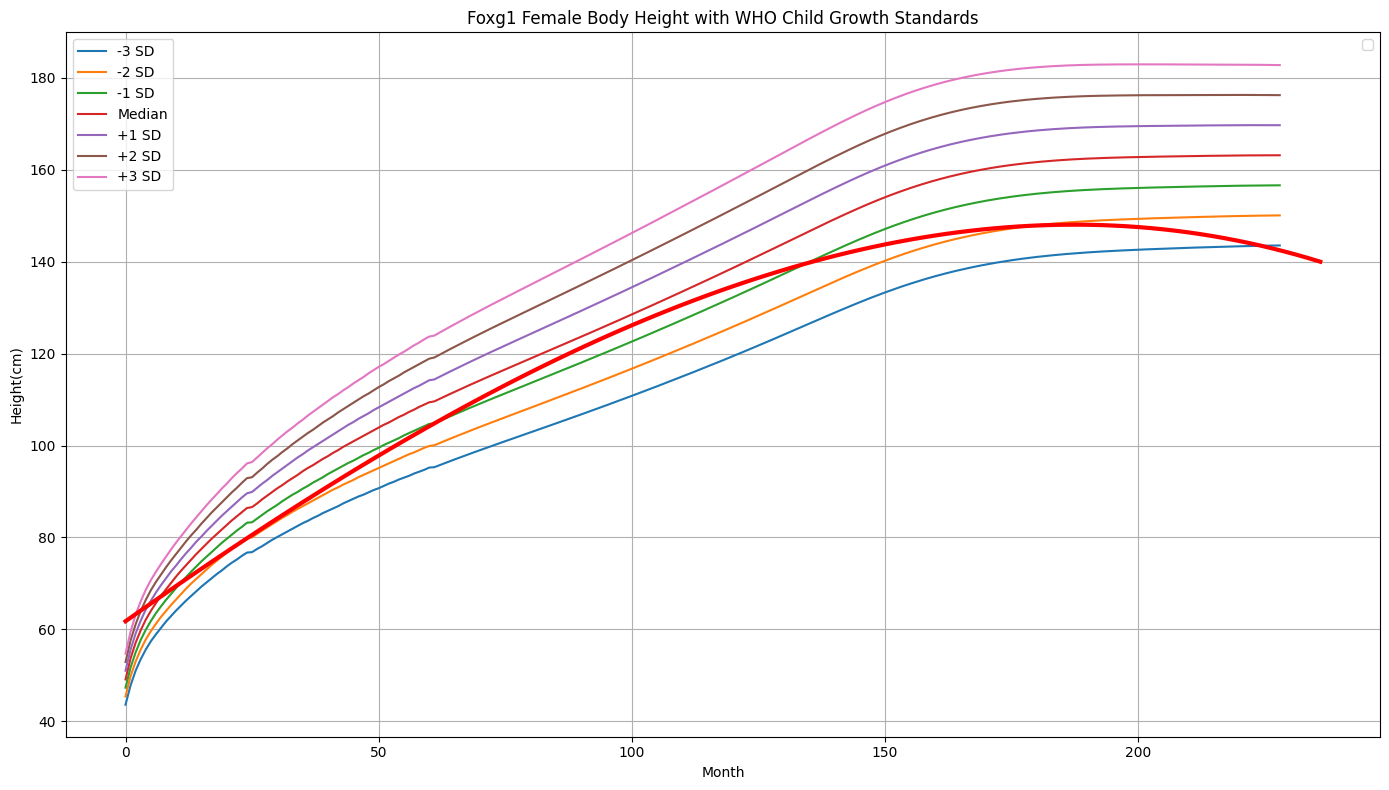

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = female_body_height_zscore_df

# Set figure size
plt.figure(figsize=(14, 8))

# Define your standard deviation columns and their corresponding labels
sd_columns = ['SD3neg', 'SD2neg', 'SD1neg', 'SD0', 'SD1', 'SD2', 'SD3']
sd_labels = ['-3 SD', '-2 SD', '-1 SD', 'Median', '+1 SD', '+2 SD', '+3 SD']

# Plotting the mean and standard deviation lines
for sd, label in zip(sd_columns, sd_labels):
    sns.lineplot(x='Month', y=sd, data=df, label=label)

# Polynomial regression for the growth parameter value
sns.regplot(x='Month', y='growth_parameter_value', data=df, order=3, scatter=False, 
            color='red', label='Growth Parameter', line_kws={'linewidth': 3}, ci=None)

# Set x and y axis labels
plt.xlabel('Month')
plt.ylabel('Height(cm)')

# Adding title
plt.title('Foxg1 Female Body Height with WHO Child Growth Standards')

# Adding grid
plt.grid(True)

# Handling the secondary y-axis for standard deviation labels
ax = plt.gca()
ax2 = ax.twinx()

# Assuming SD0 represents the median, find the min and max values for the y-axis range
y_min = df[sd_columns].min().min()
y_max = df[sd_columns].max().max()
ax2.set_ylim(y_min, y_max)

# Setting the y-ticks to correspond to the specific SD lines at the max Month value
max_month = df['Month'].max()
positions = [df[df['Month'] == max_month][sd].values[0] for sd in sd_columns]
ax2.set_yticks(positions)
ax2.set_yticklabels(sd_labels)

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
